# Isotropic hardening - One-dimensional example

This example gives the numerical implementation of the one dimensional isotropic hardening model (Houlsby & Puzrin, 2006).

The Gibbs free energy $g$ and the yield function $y$ for this model are given by:

\begin{align*}
g = & -\frac{1}{2E} \sigma^2 - \sigma \alpha\\
y = & \chi^2 - k^2(\alpha)
\end{align*}

For linear hardening, the initial yield strength parameter is set to $k_0$ and the evolution of the yield strength parameter can be defined as:

\begin{equation*}
\dot{k} = H |\dot{\alpha}|
\end{equation*}

The incremental response follows from a standardised approach, which can be written in the following form:

\begin{equation*}
\begin{Bmatrix}
-\dot{\epsilon} \\
-\dot{\bar{\chi}}
\end{Bmatrix}= 
\begin{bmatrix}
\frac{\partial^2 g}{\partial \sigma^2} & \frac{\partial^2 g}{\partial \sigma \partial \alpha} \\
\frac{\partial^2 g}{\partial \sigma \partial \alpha} & \frac{\partial^2 g}{\partial \alpha^2} \\
\end{bmatrix} 
\begin{Bmatrix}
\dot{\sigma} \\
\dot{\alpha}
\end{Bmatrix}
\end{equation*}

The rate of hardening strain is defined by:

\begin{equation*}
\dot{\alpha} = \lambda \frac{\partial y}{\partial \chi}
\end{equation*}

where the multiplyer $\lambda$ is derived from the consistency condition:
\begin{equation*}
\dot{y} = 0 = \frac{\partial y}{\partial \sigma} \dot{\sigma} + \frac{\partial y}{\partial \chi} \dot{\chi} + \frac{\partial y}{\partial \alpha} \dot{\alpha} 
\end{equation*}

Combining the above equations for the one dimensional model with Ziegler's orthogonality condition ($\chi=\bar{\chi}$) gives:
\begin{align*}
0 = & \frac{\partial y}{\partial \chi} \left( - \frac{\partial^2 g}{\partial \sigma \partial \alpha} \dot{\sigma} - \frac{\partial^2 g}{\partial \alpha^2} \lambda \frac{\partial y}{\partial \chi} \right) + \frac{\partial y}{\partial \alpha} \lambda \frac{\partial y}{\partial \chi} \\
\lambda = &  \frac{\frac{\partial y}{\partial \chi} \frac{\partial^2 g}{\partial \sigma \partial \alpha} }{\frac{\partial y}{\partial \alpha} \frac{\partial y}{\partial \chi} - \frac{\partial y}{\partial \chi} \frac{\partial^2 g}{\partial \alpha^2} \frac{\partial y}{\partial \chi}} \dot{\sigma}
\end{align*}

In [1]:
# The implementation of the above equations is given below
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Model parameters
E = 1
H = 0.3
k_0 = 1

# Initialise the model state parameters
epsilon = 0
chi = 0
alpha = 0
k = k_0

# Define the applied stress history
sigma_max_abs_1 = 1.5
sigma_max_abs_2 = 2.5
sigma_max_abs_3 = 4

d_sigma_abs = 0.01
sigma_history = np.append(np.append(np.arange(0, sigma_max_abs_1, 
        d_sigma_abs), np.arange(sigma_max_abs_1, -sigma_max_abs_2, 
        -d_sigma_abs)), np.arange(-sigma_max_abs_2, sigma_max_abs_3, d_sigma_abs))
epsilon_history = np.zeros(len(sigma_history))

d2_g_d_s2 = -1/E
d2_g_d_a2 =  0
d2_g_d_sa = -1
d2_g_d_as = -1

sigma_0 = 0

# Calculate the incremental response
for index, sigma in enumerate(sigma_history):
    
    d_sigma = sigma - sigma_0
    
    y = np.abs(chi) - k
    d_y_d_chi = 2*chi
    d_y_d_alpha = -2 * np.sign(d_sigma) * H * k
    
    if y > 0 and d_sigma * chi > 0:
        lambda_ = (d_y_d_chi * d2_g_d_sa)/(d_y_d_alpha * d_y_d_chi - d_y_d_chi * d2_g_d_a2 * d_y_d_chi) * d_sigma
    else:
        lambda_ = 0
        
    d_alpha = lambda_ * d_y_d_chi
    
    d_epsilon = - (d2_g_d_s2 * d_sigma + d2_g_d_sa * d_alpha)
    d_chi = - (d2_g_d_as * d_sigma + d2_g_d_a2 * d_alpha)
    d_k = H * np.abs(d_alpha)
    
    epsilon = epsilon + d_epsilon
    chi = chi + d_chi
    alpha = alpha + d_alpha
    k = k + d_k
    
    sigma_0 = sigma
        
    epsilon_history[index] = epsilon
    

Text(0,0.5,'$\\sigma$')

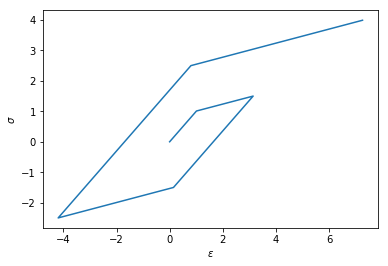

In [2]:
plt.plot(epsilon_history, sigma_history)
plt.xlabel('$\epsilon$')
plt.ylabel('$\sigma$')